In [1]:
import os
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from timeit import default_timer as timer
from datetime import timedelta
%matplotlib inline
from matplotlib.dates import DateFormatter, DayLocator

from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import string
from wordcloud import WordCloud, ImageColorGenerator


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
stop_words= set(stopwords.words('english'))

In [3]:
start = timer()

In [4]:
# Consumer keys and access tokens, used for OAuth
consumer_key= 
consumer_secret= 
access_token= 
access_token_secret= 

In [5]:
# OAuth process, using the keys and tokens
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
# Search user
search_user = "@BarackObama"

In [7]:
# Collect tweets
tweets = tw.Cursor(api.user_timeline,
                       screen_name=search_user,
                       tweet_mode = 'extended').items(800)

# Collect a list of tweets
user_table = [[tweet.created_at, tweet.favorite_count, tweet.retweet_count, tweet.full_text] for tweet in tweets]

tweet_text = pd.DataFrame(data=user_table, 
                    columns=["Date", "Likes", "Retweets", "tweet"])

pd.set_option('display.max_rows', None)
tweet_text

,Date,Likes,Retweets,tweet
0,2021-06-05 17:15:21,75437,8528,"It's always great catching up with @POTUS, and..."
1,2021-06-04 16:01:05,30667,4265,"On National Gun Violence Awareness Day, we #we..."
2,2021-06-03 16:10:11,16523,1835,Coaches like Ernest Radcliffe are changing liv...
3,2021-06-02 19:28:20,22115,1681,"Yesterday, I sat down with some of the Obama P..."
4,2021-06-02 17:23:09,18678,3202,Michelle and I are excited to share our latest...
5,2021-06-02 00:00:22,28979,2322,It’s great to be back in my hometown and even ...
6,2021-06-01 18:00:36,22324,2334,.@brhodes has been a close advisor and a good ...
7,2021-05-31 17:06:41,55673,11577,On the 100th anniversary of the Tulsa Race Mas...
8,2021-05-31 13:02:02,119364,11337,"This Memorial Day, let’s remember the men and ..."
9,2021-05-28 18:30:26,120733,15531,.@MarcusRashford is way ahead of where I was a...


In [8]:
tweet_text.describe()

,Likes,Retweets
count,8.000000e+02,8.000000e+02
mean,2.188043e+05,3.818475e+04
std,3.751935e+05,8.316661e+04
min,0.000000e+00,2.770000e+02
25%,3.514750e+04,5.404000e+03
50%,9.409700e+04,1.505800e+04
75%,2.367062e+05,3.728150e+04
max,4.244832e+06,1.521221e+06


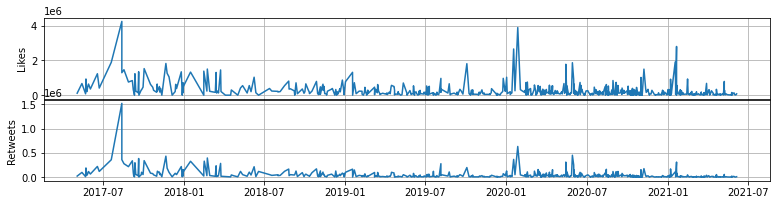

In [9]:
#First graph
ylabels = ["Likes", "Retweets"]

fig = plt.figure(figsize=(13,3))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(tweet_text["Date"],tweet_text[ylabel])
    ax.set_ylabel(ylabel)
    ax.grid(True)
plt.show()

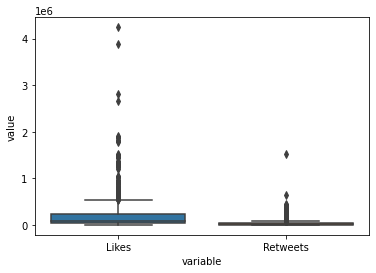

In [10]:
#BoxPlot
df = pd.DataFrame(data=tweet_text, columns=["Likes", "Retweets"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [11]:
#Tukey Method to identify outliers
# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(tweet_text.drop(['Date', 'tweet'], axis=1),0,list(tweet_text.drop(['Date', 'tweet'], axis=1)))
tweet_text.drop(['Date', 'tweet'], axis=1).loc[Outliers_to_drop]


,Likes,Retweets
26,790252,55252
57,678110,38396
106,931256,46370
120,573992,86163
122,2802025,310175
125,1911146,107529
130,919780,168931
177,1498794,174991
197,1020004,152952
285,554657,116880


In [12]:
#Create New Dataset without Outliers
good_data=tweet_text.drop(tweet_text.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      702 non-null    datetime64[ns]
 1   Likes     702 non-null    int64         
 2   Retweets  702 non-null    int64         
 3   tweet     702 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 22.1+ KB


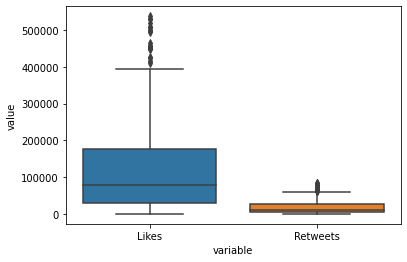

In [13]:
df = pd.DataFrame(data=good_data, columns=["Likes", "Retweets"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

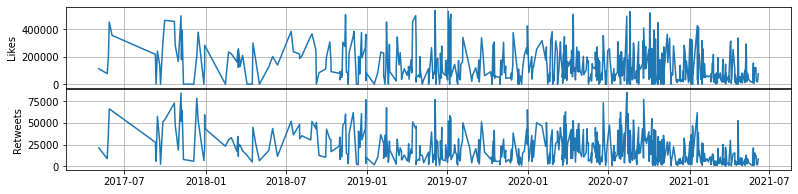

In [14]:
ylabels = ["Likes", "Retweets"]

fig = plt.figure(figsize=(13,3))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(good_data["Date"],good_data[ylabel])
    ax.set_ylabel(ylabel)
    ax.grid(True)
plt.show()

In [15]:
tweet_text['tweet'] = tweet_text['tweet'].str.lower()

In [16]:
#Clean Data
def preprocess_tweet_text(tweet):
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords          
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    
    return " ".join(filtered_words)

In [17]:
tweets_wordcloud=tweet_text['tweet'].apply(preprocess_tweet_text)

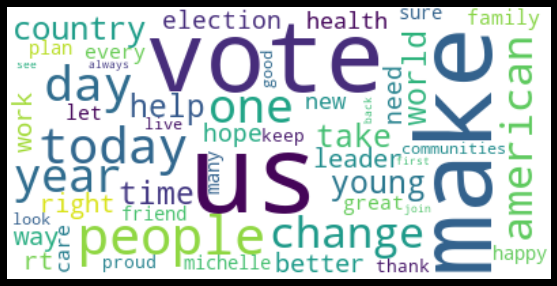

In [18]:
#Wordcloud
wordcloud = WordCloud(max_font_size=80, max_words=50, background_color="white", collocations=False).generate(" ".join(tweets_wordcloud))
plt.figure( figsize=(15,5), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
end = timer()
print("Code time:" , timedelta(seconds=end-start))

Code time: 0:00:41.617748
